# Jonathan Halverson
# Wednesday, June 21, 2017
# Chapter 2 of Bruce & Bruce

Use x_bar for sample mean and mu for population mean.

It is very likely to find patterns in a large data set because they will occur by chance. It is important to specify your hypotheses before examining the data for this reason.

Regression to the mean is the phenomenon where a process at an extreme value is likely to yield a less extreme value at the next evaluation. An example is the rookie of the year phenomenon where all rookies in a given sport are of approximately equal skill level and by chance one of them is elevated above the others. The next season luck is not on their side and the sophomore slump is observed. Of course, in some causes the person who wins rookie of the year is actually better than the pack and they continue to show this.

Stratified sampling is when the population is divided into strata and random samples are taken within each stratum.

A sample statistic is a metric calculated from a sample of the population. In inferential statistics we are interested in the sampling distribution of the metric. The standard deviation of the sampling distribution is equal to the stardard error.

### Demonstration of the bootstrap

Below we compute the standard error and 90% confidence interval using both the equation based approach as well as resampling techniques.

In [1]:
import numpy as np
from numpy.random import lognormal
from numpy.random import choice

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

Generate a population drawn from the lognormal distribution:

In [3]:
population = lognormal(mean=1.0, sigma=0.5, size=10000)
population.mean(), population.std()

(3.1083379765227734, 1.6488206962012042)

(array([  6.34000000e+02,   2.78300000e+03,   2.72600000e+03,
          1.76000000e+03,   9.79000000e+02,   5.53000000e+02,
          2.74000000e+02,   1.46000000e+02,   6.50000000e+01,
          3.40000000e+01,   2.50000000e+01,   9.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.31253701,   1.26853515,   2.22453329,   3.18053143,
          4.13652957,   5.09252771,   6.04852585,   7.004524  ,
          7.96052214,   8.91652028,   9.87251842,  10.82851656,
         11.7845147 ,  12.74051284,  13.69651098,  14.65250912,
         15.60850726,  16.56450541,  17.52050355,  18.47650169,
         19.43249983,  20.38849797,  21.34449611,  22.30049425,
         23.25649239,  24.21249053]),
 <a list of 25 Patch objects>)

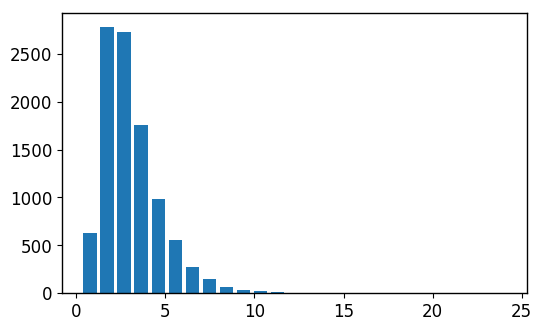

In [22]:
plt.hist(population, bins=25, rwidth=0.8)

Create a sample drawn from the population:

In [5]:
sample = choice(population, size=25, replace=False)
sample.mean(), sample.std()

(2.5673222866792944, 1.3303872238416519)

Create a sampling distribution by drawing multiple samples, computing the mean of each and then constructing a histogram:

In [6]:
sample_statistics = []
for _ in range(1000):
     sample_statistics.append(choice(population, size=25, replace=False).mean())

(array([   2.,    2.,    5.,    7.,   18.,   32.,   43.,   66.,   74.,
         113.,   95.,  100.,  105.,   77.,   83.,   53.,   47.,   24.,
          18.,   11.,    8.,    8.,    3.,    3.,    3.]),
 array([ 2.11785731,  2.20424436,  2.2906314 ,  2.37701845,  2.46340549,
         2.54979254,  2.63617958,  2.72256663,  2.80895367,  2.89534072,
         2.98172776,  3.06811481,  3.15450185,  3.2408889 ,  3.32727594,
         3.41366299,  3.50005003,  3.58643708,  3.67282412,  3.75921117,
         3.84559821,  3.93198526,  4.0183723 ,  4.10475935,  4.19114639,
         4.27753344]),
 <a list of 25 Patch objects>)

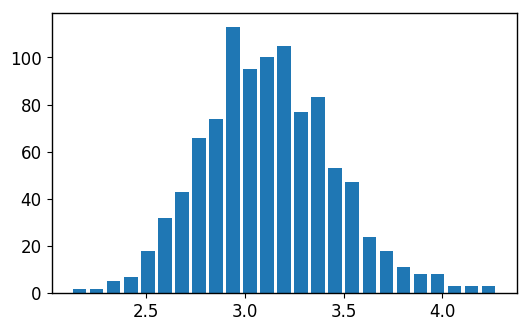

In [23]:
plt.hist(sample_statistics, bins=25, rwidth=0.8)

The standard deviation of the sampling distribution is the standard error:

In [8]:
np.array(sample_statistics).mean(), np.array(sample_statistics).std()

(3.118904107831713, 0.33514115418184987)

The standard deviation of the population is reconstructed by multiplying the standard deviation of the sampling distribution by the square root of the sample size:

In [9]:
np.array(sample_statistics).std() * 25**0.5

1.6757057709092493

In [10]:
np.array(sample_statistics).std()

0.33514115418184987

The standard error based on the single sample is:

In [11]:
sample.std() / 25**0.5

0.2660774447683304

Note that the above result agrees with the standard deviation of the sampling distriubtion.

Generate bootstrap samples from the 25 samples (not the population) and compute the mean of each:

In [12]:
bstraps = []
for _ in range(1000):
     bstraps.append(choice(sample, size=25, replace=True).mean())

Plot the distribution of the means:

(array([   4.,    7.,   35.,   40.,   56.,  116.,  114.,  121.,  120.,
         114.,   85.,   71.,   36.,   33.,   21.,   11.,    8.,    5.,
           2.,    1.]),
 array([ 1.89342217,  1.9763539 ,  2.05928562,  2.14221734,  2.22514906,
         2.30808079,  2.39101251,  2.47394423,  2.55687595,  2.63980767,
         2.7227394 ,  2.80567112,  2.88860284,  2.97153456,  3.05446628,
         3.13739801,  3.22032973,  3.30326145,  3.38619317,  3.46912489,
         3.55205662]),
 <a list of 20 Patch objects>)

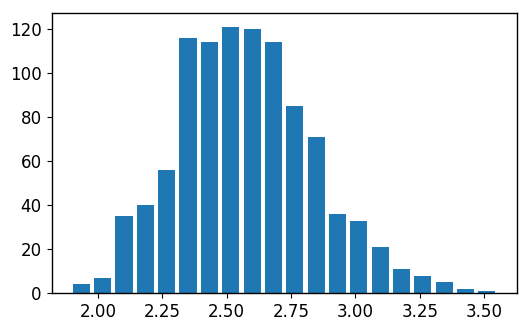

In [21]:
plt.hist(bstraps, rwidth=0.8, bins=20)

The standard deviation of the bootstrapped sampling distribution is the standard error that we seek:

In [14]:
np.array(bstraps).std()

0.26568801977688683

### What is the 90% confidence interval of the sample mean according to bootstrapping?

In [15]:
np.array(bstraps).mean()

2.5753155115015658

In [16]:
for i, val in enumerate(sorted(bstraps)):
     if i == 49 or i == 950: print i, val

49 2.15203712263
950 3.05150582319


In [17]:
np.percentile(bstraps, q=5), np.percentile(bstraps, q=95)

(2.1522102459576895, 3.0403745070401555)

The 90% confidence interval is [2.15, 3.04].

Using the equation based approach:

In [18]:
from scipy.stats import t

lo = sample.mean() + t.ppf(0.05, df=24) * sample.std() / 25**0.5
hi = sample.mean() - t.ppf(0.05, df=24) * sample.std() / 25**0.5
lo, hi

(2.1120951545570672, 3.0225494188015216)

### Black Swan

The black swan theory predicts that anamalous events are much more likely to occur than would be predicted by the normal distribution. A random variable that does not follow a normal distribution will not give a good fit on a QQ plot.

Gossett introducted the t-distribution in 1908. This is a part of classical statistical inference. The author argues that resampling methods are a better choice since computers are plenty fast enough today.

### Poisson distribution

The number of events per unit time (or space) is typically modeled by a Poisson distribution. This assumes independent events. The number of heart attacks per day in NYC is one example. Or the number of visitors to a web site per hour. Or the number of typos per word in a newspaper. It is specified by the lambda parameter. The number time between events is given by the exponential distribution. Time to failure is typically described by the Weilbull distribution which is like the exponential distribution but with a parameter which accelerates or decelerates failure as time increaes (i.e., the lambda parameter changes over time).

$$ f(k) = \frac{\lambda^ke^{-\lambda}}{k!} $$

In [42]:
poisson.rvs(loc=10)

TypeError: _parse_args_rvs() takes at least 2 arguments (2 given)

In [99]:
from scipy.stats import expon
from scipy.stats import poisson

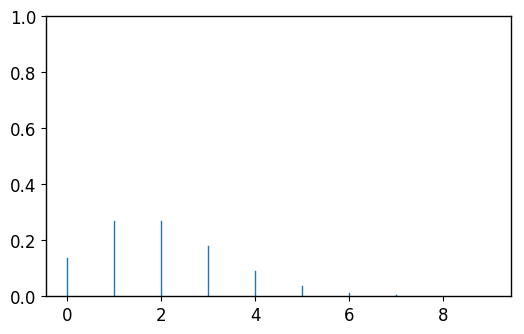

In [91]:
for k in range(10):
     plt.axvline(x=k, ymax=poisson.pmf(mu=2, k=k), ymin=0)

(array([  1.36013601e-01,   2.71727173e-01,   2.71527153e-01,
          1.83118312e-01,   8.54085409e-02,   3.87038704e-02,
          1.08010801e-02,   2.50025003e-03,   2.00020002e-04]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Patch objects>)

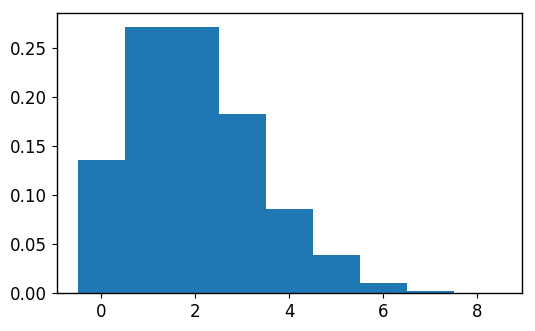

In [98]:
plt.hist(poisson.rvs(mu=2, size=10000), bins=np.arange(-0.5, 9, 1.0), rwidth=1, normed=True)

### Exponential distribution